In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc_stats

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 12,
  'grid.alpha': 0.25})


## Binomial distribution

The probability of getting exactly $k$ successes in $n$ independent Bernoulli trials. a Bernoulli trials is a single success/failure experiment. The possible value of $k$ is $\{0, 1, 2, 3,\ldots, n\}$

$n \in \{0, 1, 2, \ldots\}$ number of trials   
$p \in [0, 1]$ - success probability for each trial   
$q = 1 - p$


In [114]:
def get_pmf(x, p):
  pmf_arr = sc_stats.binom.pmf(x, len(x), p)
  pmf_arr = np.append(pmf_arr, pmf_arr[0])
  x = np.append(x, len(x))
  return x, pmf_arr

In [136]:
significance_lvl = 0.05
print(f"-"*17)
print(f"{'i':>2s}  {'cdf':^5s}  {'pmf':^5s}")
print(f"-"*17)
for i in range(n+1):
  print(f"{i:2d}  {sc_stats.binom.cdf(i, n, p):5.3f}"
    f"  {sc_stats.binom.pmf(i, n, p):5.3f}")


-----------------
 i   cdf    pmf 
-----------------
 0  0.001  0.001
 1  0.011  0.010
 2  0.055  0.044
 3  0.172  0.117
 4  0.377  0.205
 5  0.623  0.246
 6  0.828  0.205
 7  0.945  0.117
 8  0.989  0.044
 9  0.999  0.010
10  1.000  0.001


In [140]:
n = 10
p = 0.5
x_data = np.arange(n, dtype=int)
x_data, binom_pmf = get_pmf(x_data, p)

We found that for $k = \{0, 1\}$ or $k = \{9, 10\}$, the probability to 
get this number of error is less than 0.05 (or exactly 0.021, see table below).   

If the process is in control and the analyst decides to monitor the last 10 error values, $U$ (the number of errors out of last $k$), $U$ has an expected value of $np = 10 \times 0.5 = 5$ (Bernoulli distribution).

With this information, a tracking system can be developed based on the following rules:

If $2 \leq U \leq 8$, then the process is in control.   
If $U < 2$ or $U > 8$, then the process is out of control. 


In [146]:
for i in range(1, 4):
  l_bound_cdf = sum(binom_pmf[:i])
  u_bound_cdf = sum(binom_pmf[-i:])

  signif_lvl = l_bound_cdf + u_bound_cdf
  print(f"{i:>2d}  {l_bound_cdf:.3f}  {u_bound_cdf:.3f}"
    f"  {l_bound_cdf + u_bound_cdf:.3f}")

 1  0.001  0.001  0.002
 2  0.011  0.011  0.021
 3  0.055  0.055  0.109


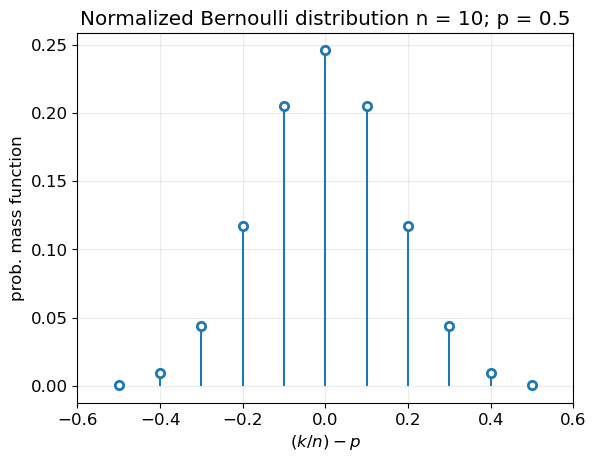

In [153]:
fig, ax = plt.subplots()

x_data_normalized = (x_data/n - p)

ax.vlines(x_data_normalized, 0, binom_pmf)
ax.plot(x_data_normalized, binom_pmf, marker='o', markerfacecolor="white", 
  linestyle="None", markeredgewidth=2)

margin = 6
ax.set_xlim([-margin/n, margin/n])
ax.set_xlabel(r"$(k/n) - p$")
ax.set_ylabel("prob. mass function")
ax.set_title(f"Normalized Bernoulli distribution n = {n}"
  f"; p = {p}")
ax.grid("on")

plt.show(fig)